<h1>Team Members:</h1>

    1. Shreya Sekhar
    2. Swathi Rajendran
    3. Naga Bhanu Santosh Kumar Rayasam
    4. Sasidhar Atluri

<h1>Covid-19 : Predictive Analysis</h1>

Covid-19 is a contagious disease that became a pandemic in 2020 mainly spreading through close contact with the infected person. Our objective here is to do descriptive analysis on a merged daily data of Belgium people for all age groups. Correlations will be examined between positive cases, hospitalizations,vaccinations and death rate. Based on the knowledge, a linear regression model will be used to predict the progression of the disease as vaccinations increase with accuracy.

<h2>Data Source</h2>
The data is downloaded from: <a> href="https://data.gov.be/en/dataset/1030d556bc6489a9d1e85994e25d6bd01d53ce6b</a>
<h2>Data Description</h2>

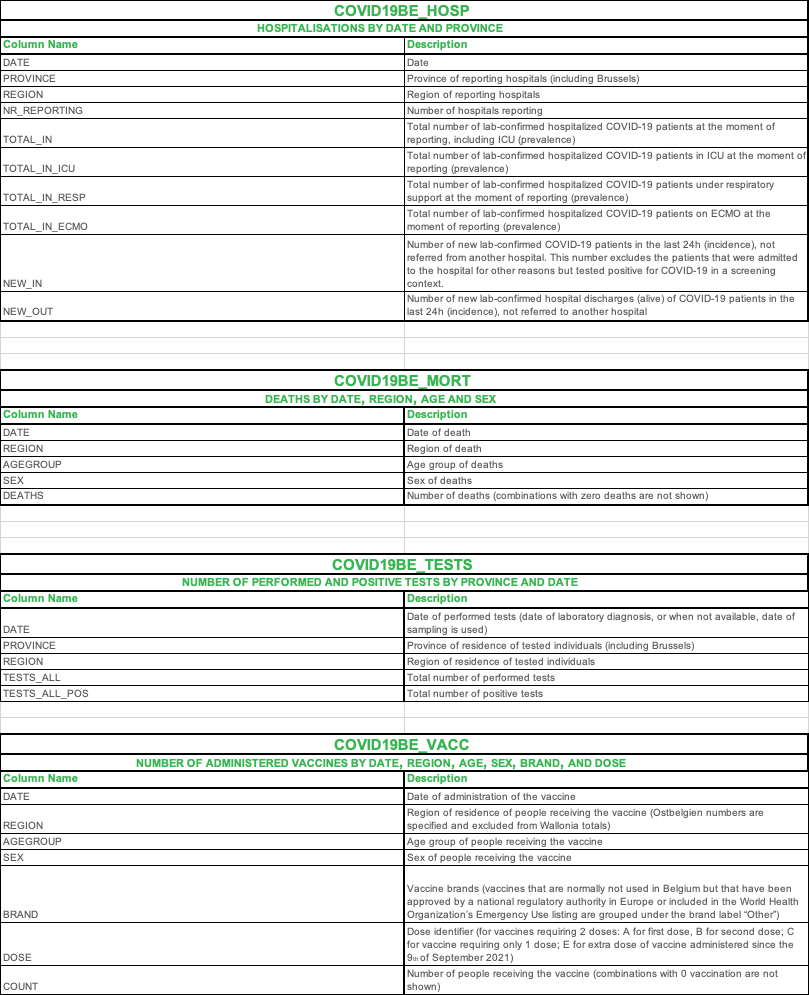

Our aim is to predict the number of covid cases with number of vaccination. Therefore number of covid cases is our target variable on which we will test the effects of other predictors.**

<h1>CRISP-DM Process:</h1>

<h3>Loading all the necessary packages</h3>

In [1]:
#importing packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

<h3>Importing all the datasets required</h3>

In [2]:
csv4=pd.read_csv("/Users/shreyasekhar/Desktop/KDD/KDD Data Sets Covid 19/COVID19BE_HOSP.csv")
csv5=pd.read_csv("/Users/shreyasekhar/Desktop/KDD/KDD Data Sets Covid 19/COVID19BE_MORT.csv")
csv7=pd.read_csv("/Users/shreyasekhar/Desktop/KDD/KDD Data Sets Covid 19/COVID19BE_tests.csv")
csv9=pd.read_csv("/Users/shreyasekhar/Desktop/KDD/KDD Data Sets Covid 19/COVID19BE_VACC.csv")

<h2>Data Viewing,Grouping and Cleaning:</h2>

Getting some information about the dataset using info method. It tells us about the shape of the dataset , data types of the features, etc

<h6>Sample Data display: Hospital Data CSV</h6>

In [3]:
csv4.head()

,DATE,PROVINCE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
0,2020-03-15,Antwerpen,Flanders,14,50,9,4,0,7,4
1,2020-03-15,Brussels,Brussels,15,58,11,8,0,7,2
2,2020-03-15,Hainaut,Wallonia,14,54,12,10,1,26,1
3,2020-03-15,Limburg,Flanders,7,20,6,3,0,9,3
4,2020-03-15,Liège,Wallonia,12,22,2,1,0,4,1


Display sum of null values in the each column of the hospital dataset. It shows all the data does not have the nulls

In [4]:
csv4.isnull().sum()

DATE             0
PROVINCE         0
REGION           0
NR_REPORTING     0
TOTAL_IN         0
TOTAL_IN_ICU     0
TOTAL_IN_RESP    0
TOTAL_IN_ECMO    0
NEW_IN           0
NEW_OUT          0
dtype: int64

 Display sum of null values in the each column of the mortality dataset. It shows the columns agegroup and sex columns have the null values.

<h6>Sample Data display: Mortality Data CSV</h6>

In [5]:
csv5.head()

,DATE,REGION,AGEGROUP,SEX,DEATHS
0,2020-03-10,Brussels,85+,F,1
1,2020-03-11,Flanders,85+,M,1
2,2020-03-11,Brussels,65-74,M,1
3,2020-03-11,Brussels,85+,F,1
4,2020-03-12,Brussels,75-84,M,1


In [6]:
csv5.isnull().sum()

DATE         0
REGION       0
AGEGROUP    25
SEX         17
DEATHS       0
dtype: int64

Display sum of null values in the each column of the mortality dataset. It shows the columns agegroup and sex columns have the null values. As those are not used in our analysis we are dropping the columns.

In [7]:
csv5=csv5.drop(columns="SEX")

In [8]:
csv5=csv5.drop(columns="AGEGROUP")

In [9]:
csv5.isnull().sum()

DATE      0
REGION    0
DEATHS    0
dtype: int64

 Display sum of null values in the each column of the covid tests dataset. It shows the columns PROVINCE and REGION have the null values. As PROVINCE column we are not using in our analysis we are dropping the column. We need the region wise data for analysis we are adding a default values for all those records which have null in the Region column as 'REGION NA'. So that we can use the column as the categorical data column to dervie useful insights like cases per region against vaccination count at region level.

<h6>Sample Data display: COVID Test Data CSV</h6>

In [10]:
csv7.head()

,DATE,PROVINCE,REGION,TESTS_ALL,TESTS_ALL_POS
0,2020-03-01,Antwerpen,Flanders,18,0
1,2020-03-01,BrabantWallon,Wallonia,8,0
2,2020-03-01,Brussels,Brussels,4,0
3,2020-03-01,Hainaut,Wallonia,5,0
4,2020-03-01,Liège,Wallonia,8,0


Display sum of null values in the each column of the vaccination dataset.

In [11]:
csv7.isnull().sum()

DATE               0
PROVINCE         580
REGION           580
TESTS_ALL          0
TESTS_ALL_POS      0
dtype: int64

In [12]:
csv7=csv7.drop(columns="PROVINCE")

In [13]:
csv7=csv7.fillna(value={'REGION': 'REGION NA'}, inplace=False)

In [14]:
csv7.isnull().sum()

DATE             0
REGION           0
TESTS_ALL        0
TESTS_ALL_POS    0
dtype: int64

It shows the columns SEX and REGION have the null values. As SEX, AGEGROUP column we are not using in our analysis we are dropping the column. We need the region wise data for analysis we are adding a default values for all those records which have null in the Region column as 'REGION NA'. So that we can use the column as the categorical data column to dervie useful insights like cases per region against vaccination count at region level.

<h6>Sample Data display: Vaccination Data CSV</h6>

In [15]:
csv9.head()

,DATE,REGION,AGEGROUP,SEX,BRAND,DOSE,COUNT
0,2020-12-28,Brussels,25-34,F,Pfizer-BioNTech,A,1
1,2020-12-28,Brussels,45-54,F,Pfizer-BioNTech,A,2
2,2020-12-28,Brussels,55-64,F,Pfizer-BioNTech,A,3
3,2020-12-28,Brussels,55-64,M,Pfizer-BioNTech,A,1
4,2020-12-28,Brussels,65-74,F,Pfizer-BioNTech,A,2


In [16]:
csv9.isnull().sum()

DATE            0
REGION      16037
AGEGROUP        0
SEX           527
BRAND           0
DOSE            0
COUNT           0
dtype: int64

In [17]:
csv9=csv9.drop(columns="SEX")

In [18]:
csv9=csv9.drop(columns="AGEGROUP")

In [19]:
csv9=csv9.fillna(value={'REGION': 'REGION NA'}, inplace=False)

In [20]:
csv9.isnull().sum()

DATE      0
REGION    0
BRAND     0
DOSE      0
COUNT     0
dtype: int64

In [21]:
csv4.drop(columns="PROVINCE")

,DATE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT
0,2020-03-15,Flanders,14,50,9,4,0,7,4
1,2020-03-15,Brussels,15,58,11,8,0,7,2
2,2020-03-15,Wallonia,14,54,12,10,1,26,1
3,2020-03-15,Flanders,7,20,6,3,0,9,3
4,2020-03-15,Wallonia,12,22,2,1,0,4,1
...,...,...,...,...,...,...,...,...,...
6221,2021-10-01,Wallonia,6,21,8,4,1,1,0
6222,2021-10-01,Flanders,14,46,19,14,4,2,5
6223,2021-10-01,Flanders,6,32,10,6,1,3,1
6224,2021-10-01,Wallonia,2,9,2,2,0,0,0


Aggregating the data per date and the region and taking the count of the other columns to bring all the datasets to date and region level so that we will be able to merge the datasets.

In [22]:
csv4=csv4.groupby(['DATE', 'REGION'])

In [23]:
csv4=csv4.sum().reset_index()

For the mortality data as well we are making the data consistent at all level of region and date.

In [24]:
csv5=csv5.groupby(['DATE', 'REGION'])

In [25]:
csv5=csv5.sum().reset_index()

For the tests data as well we are making the data consistent at all level of region and date.

In [26]:
csv7=csv7.groupby(['DATE', 'REGION'])

In [27]:
csv7=csv7.sum().reset_index()

For the vaccination data as well we are making the data consistent at all level of region and date.

In [28]:
csv9=csv9.groupby(['DATE', 'REGION','BRAND','DOSE'])

In [29]:
csv9=csv9.sum().reset_index()

<h2>Data Merging:</h2>

In [30]:
#Merge data 
csv59=pd.merge(csv5,csv9, how='left')

In [31]:
csv59.head()

,DATE,REGION,DEATHS,BRAND,DOSE,COUNT
0,2020-03-10,Brussels,1,NaN,NaN,NaN
1,2020-03-11,Brussels,2,NaN,NaN,NaN
2,2020-03-11,Flanders,1,NaN,NaN,NaN
3,2020-03-12,Brussels,1,NaN,NaN,NaN
4,2020-03-13,Brussels,3,NaN,NaN,NaN


Checking for the nulls after joining the datasets.

In [32]:
csv59.isnull().sum()

DATE        0
REGION      0
DEATHS      0
BRAND     775
DOSE      775
COUNT     775
dtype: int64

Its obivous that all the regions for all the dates might not have the data. As vaccination start date is on Dec12, 2020 but the covid cases reported from March,2020. Therefore, replacing the nulls with the default values in the joined data.

In [33]:
csv59=csv59.fillna(value={'BRAND': 'BRAND NA'}, inplace=False)

In [34]:
csv59=csv59.fillna(value={'DOSE': 'DOSE NA'}, inplace=False)

In [35]:
csv59=csv59.fillna(value={'COUNT': 0}, inplace=False)

Checking the null count after the replace again.

In [36]:
csv59.isnull().sum()

DATE      0
REGION    0
DEATHS    0
BRAND     0
DOSE      0
COUNT     0
dtype: int64

In [37]:
dup59=csv59[csv59.duplicated()]

In [38]:
print(dup59)

Empty DataFrame
Columns: [DATE, REGION, DEATHS, BRAND, DOSE, COUNT]
Index: []


Merging the hospital and the covid tests datasets.

In [39]:
#Merge data
csv47=pd.merge(csv4,csv7)

In [40]:
csv47.head()

,DATE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT,TESTS_ALL,TESTS_ALL_POS
0,2020-03-15,Brussels,15,58,11,8,0,7,2,106,17
1,2020-03-15,Flanders,52,118,25,9,0,29,10,678,70
2,2020-03-15,Wallonia,37,87,17,14,1,34,2,441,76
3,2020-03-16,Brussels,15,81,14,11,0,11,4,120,41
4,2020-03-16,Flanders,52,159,40,20,0,43,7,1138,146


In [41]:
csv47.isnull().sum()

DATE             0
REGION           0
NR_REPORTING     0
TOTAL_IN         0
TOTAL_IN_ICU     0
TOTAL_IN_RESP    0
TOTAL_IN_ECMO    0
NEW_IN           0
NEW_OUT          0
TESTS_ALL        0
TESTS_ALL_POS    0
dtype: int64

In [42]:
dup47=csv47[csv47.duplicated()]
print(dup47)

Empty DataFrame
Columns: [DATE, REGION, NR_REPORTING, TOTAL_IN, TOTAL_IN_ICU, TOTAL_IN_RESP, TOTAL_IN_ECMO, NEW_IN, NEW_OUT, TESTS_ALL, TESTS_ALL_POS]
Index: []


Creating the final merge data. This includes all the Hospital, Tests, Vaccination details, mortality data.

In [43]:
final_data=pd.merge(csv47,csv59,how='left')

Displaying the final merged dataset

In [44]:
final_data.tail()

,DATE,REGION,NR_REPORTING,TOTAL_IN,TOTAL_IN_ICU,TOTAL_IN_RESP,TOTAL_IN_ECMO,NEW_IN,NEW_OUT,TESTS_ALL,TESTS_ALL_POS,DEATHS,BRAND,DOSE,COUNT
5891,2021-09-30,Wallonia,37,273,67,33,8,29,27,15512,975,7.0,Pfizer-BioNTech,B,28.0
5892,2021-09-30,Wallonia,37,273,67,33,8,29,27,15512,975,7.0,Pfizer-BioNTech,E,303.0
5893,2021-10-01,Brussels,15,200,63,37,10,13,20,151,6,NaN,NaN,NaN,NaN
5894,2021-10-01,Flanders,52,240,79,46,11,28,23,915,37,NaN,NaN,NaN,NaN
5895,2021-10-01,Wallonia,37,265,62,31,8,23,30,155,1,NaN,NaN,NaN,NaN


Looking at the final data number of columns and the rows.

In [45]:
#Find Dimension of data
final_data.shape

(5896, 15)

In [46]:
#Find Duplicate Data
dup_fin=final_data[final_data.duplicated()]

In [47]:
print(dup_fin)

Empty DataFrame
Columns: [DATE, REGION, NR_REPORTING, TOTAL_IN, TOTAL_IN_ICU, TOTAL_IN_RESP, TOTAL_IN_ECMO, NEW_IN, NEW_OUT, TESTS_ALL, TESTS_ALL_POS, DEATHS, BRAND, DOSE, COUNT]
Index: []


<h2> Handling Missing Values</h2>

Its obvious that the final dataset created from the 2 intermediate joined datasets( hospital+ tests ,  mortality + vaccines) have null values as for each date in the datasets might not records deaths in each and every region and there might be no covid cases in some regions as well. Thus the nulls exsist and replacing those nulls in the final merged data with default values.

In [48]:
final_data.isnull().sum()

DATE               0
REGION             0
NR_REPORTING       0
TOTAL_IN           0
TOTAL_IN_ICU       0
TOTAL_IN_RESP      0
TOTAL_IN_ECMO      0
NEW_IN             0
NEW_OUT            0
TESTS_ALL          0
TESTS_ALL_POS      0
DEATHS           195
BRAND            195
DOSE             195
COUNT            195
dtype: int64

In [49]:
final_data=final_data.fillna(value={'DEATHS': 0}, inplace=False)

In [50]:
final_data=final_data.fillna(value={'DOSE': 'DOSE NA'}, inplace=False)

In [51]:
final_data=final_data.fillna(value={'COUNT': 0}, inplace=False)

In [52]:
final_data=final_data.fillna(value={'BRAND': 'BRAND NA'}, inplace=False)

Checking for the nulls in the final joined dataset after replacing the nulls with the default to make sure all the nulls are replaced.

In [53]:
final_data.isnull().sum()

DATE             0
REGION           0
NR_REPORTING     0
TOTAL_IN         0
TOTAL_IN_ICU     0
TOTAL_IN_RESP    0
TOTAL_IN_ECMO    0
NEW_IN           0
NEW_OUT          0
TESTS_ALL        0
TESTS_ALL_POS    0
DEATHS           0
BRAND            0
DOSE             0
COUNT            0
dtype: int64

Finally checking the data size .i.e, number of rows and columns in the final data set containing all the required data after the data preprocessing step.

In [54]:
final_data.shape

(5896, 15)

<h2>Categorization of Data:</h2>

Creating the categorical data from the columns like region, vaccine brand and Dosage so that these categorical data can be used in the better visualization the data to show how many vaccines and doses of each vaccine given at each region. The REGION, BRAND,DOSE are object type data and cannot be used as such for visualizing so are converted to categorical data.

In [55]:

final_data['REGION_categ'] = final_data['REGION']
final_data['BRAND_categ'] = final_data['BRAND']
final_data['DOSE_categ'] = final_data['DOSE']

brand_labels = final_data['BRAND_categ'].astype('category').cat.categories.tolist()
replace_map_comp = {'BRAND_categ' : {k: v for k,v in zip(brand_labels,list(range(1,len(brand_labels)+1)))}}
print(replace_map_comp)

dose_labels = final_data['DOSE_categ'].astype('category').cat.categories.tolist()
replace_dose_map = {'DOSE_categ' : {k: v for k,v in zip(dose_labels,list(range(1,len(brand_labels)+1)))}}
print(replace_dose_map)




region_labels = final_data['REGION_categ'].astype('category').cat.categories.tolist()
replace_region_map = {'REGION_categ' : {k: v for k,v in zip(region_labels,list(range(1,len(brand_labels)+1)))}}

print(replace_region_map)

final_data["DATE"]= pd.to_datetime(final_data["DATE"])


final_data.replace(replace_dose_map, inplace=True)
final_data.replace(replace_map_comp, inplace=True)
final_data.replace(replace_region_map, inplace=True)

{'BRAND_categ': {'AstraZeneca-Oxford': 1, 'BRAND NA': 2, 'Johnson&Johnson': 3, 'Moderna': 4, 'Other': 5, 'Pfizer-BioNTech': 6}}
{'DOSE_categ': {'A': 1, 'B': 2, 'C': 3, 'DOSE NA': 4, 'E': 5}}
{'REGION_categ': {'Brussels': 1, 'Flanders': 2, 'Wallonia': 3}}


Displaying the information about the final data set after creating the categorical data columns.

In [56]:
final_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5896 entries, 0 to 5895
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   DATE           5896 non-null   datetime64[ns]
 1   REGION         5896 non-null   object        
 2   NR_REPORTING   5896 non-null   int64         
 3   TOTAL_IN       5896 non-null   int64         
 4   TOTAL_IN_ICU   5896 non-null   int64         
 5   TOTAL_IN_RESP  5896 non-null   int64         
 6   TOTAL_IN_ECMO  5896 non-null   int64         
 7   NEW_IN         5896 non-null   int64         
 8   NEW_OUT        5896 non-null   int64         
 9   TESTS_ALL      5896 non-null   int64         
 10  TESTS_ALL_POS  5896 non-null   int64         
 11  DEATHS         5896 non-null   float64       
 12  BRAND          5896 non-null   object        
 13  DOSE           5896 non-null   object        
 14  COUNT          5896 non-null   float64       
 15  REGION_categ   5896 n

In [57]:
final=final_data[["DATE","NR_REPORTING","TOTAL_IN","TOTAL_IN_ICU","TOTAL_IN_RESP","TOTAL_IN_ECMO","NEW_IN","NEW_OUT","TESTS_ALL","TESTS_ALL_POS","DEATHS","COUNT","REGION_categ","BRAND_categ","DOSE_categ"]]

<h2>EXPLORATORY DATA ANALYSIS: Data Visualization</h2>

The scatter plot plotting the number of vaccines against the postive covid cases clearly shows the cases count dropped from 10k cases when the vaccine count is 0 to less than 2k after the administration of the vaccines.

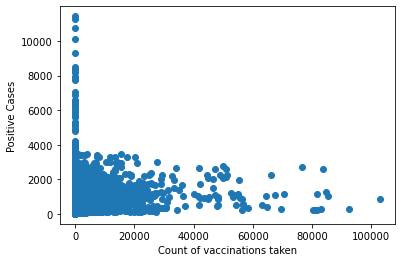

In [58]:
#Scatter Plot
COUNT=final["COUNT"]
TESTS_ALL_POS=final["TESTS_ALL_POS"]
plt.xlabel("Count of vaccinations taken")
plt.ylabel("Positive Cases")
plt.scatter(COUNT,TESTS_ALL_POS)
plt.show()

Displaying the data description of each column which would give us mean, min, max, standard deviation, and quartiles of the numerical columns. For the better visualization have transposed the result set so that it can be viewed for each column row wise.

In [59]:
final.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
NR_REPORTING,5896.0,35.693860,15.243249,14.0,15.00,37.0,52.00,53.0
TOTAL_IN,5896.0,551.981682,500.724569,20.0,192.00,354.0,899.00,3344.0
TOTAL_IN_ICU,5896.0,145.871438,124.616513,2.0,58.00,103.0,200.00,691.0
TOTAL_IN_RESP,5896.0,84.844301,73.319415,1.0,31.00,62.0,111.00,510.0
TOTAL_IN_ECMO,5896.0,11.351255,7.375009,0.0,6.00,10.0,18.00,40.0
NEW_IN,5896.0,43.303765,42.833744,0.0,14.00,28.0,64.00,397.0
NEW_OUT,5896.0,44.423168,44.272786,0.0,15.00,28.0,58.25,326.0
TESTS_ALL,5896.0,15331.717605,11184.212330,106.0,6558.00,11926.0,23360.00,57728.0
TESTS_ALL_POS,5896.0,879.078358,852.160266,1.0,310.75,640.5,1192.00,11426.0
DEATHS,5896.0,9.806309,14.977522,0.0,2.00,5.0,12.00,155.0


Scatter matrix displays the data against each and every column and here with the help of the scatter matrix we can draw the relations with each and every column. From the scatter matrix we can report hospitals increased and the total positive cases came down and also the patients in ICU and Respiratory support and ECMO support also going down. We can clearly observe that the postive cases and the deaths going down when plotted against vaccine, as vaccine numbers increased The death count and the postive cases coming down. The number tests performed is consistent throughout the data against each other column.

array([[<AxesSubplot:xlabel='NR_REPORTING', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='TOTAL_IN', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='TOTAL_IN_ICU', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='TOTAL_IN_RESP', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='TOTAL_IN_ECMO', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='NEW_IN', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='NEW_OUT', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='TESTS_ALL', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='TESTS_ALL_POS', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='DEATHS', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='COUNT', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='REGION_categ', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='BRAND_categ', ylabel='NR_REPORTING'>,
        <AxesSubplot:xlabel='DOSE_categ', ylabel='NR_REPORTING'>],
       [<AxesSubplot:xlabel='NR_REPORTING', ylabel='TOTAL_IN'>,
        <AxesS

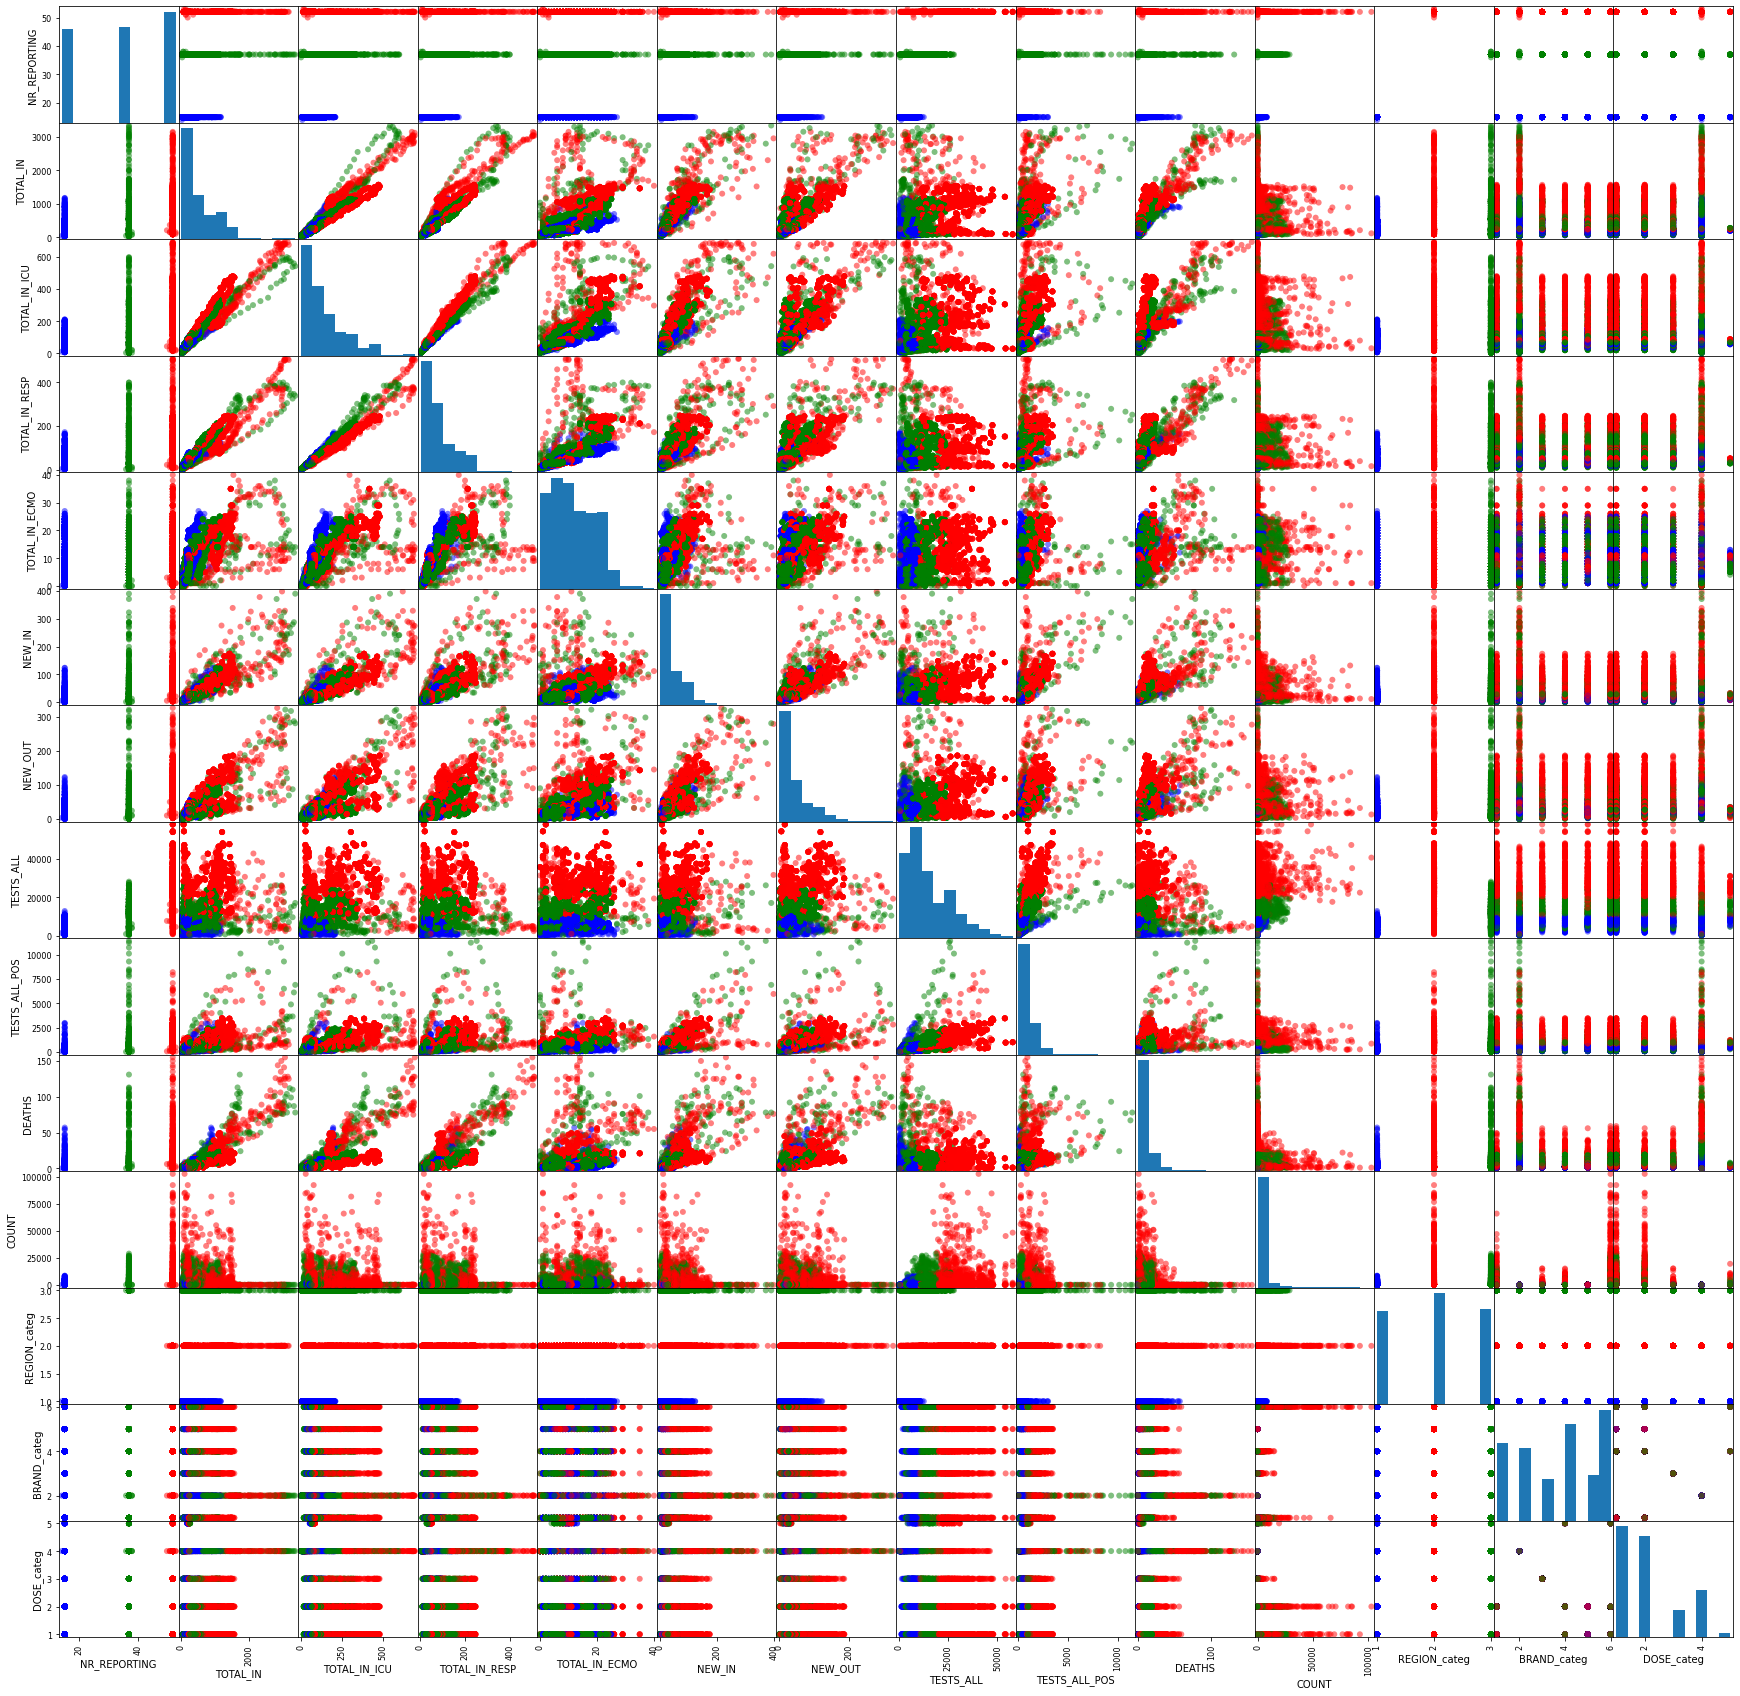

In [60]:
#Scatter Matrix
reg_colors = {1:'blue', 2:'red',3:'green'}
pd.plotting.scatter_matrix(final.loc[:,"DATE":"DOSE_categ"],figsize=(30,30),grid=True,
                           marker='o', c= final['REGION_categ'].map(reg_colors))

We are using a barplot to display the brand of vaccine and the doseage required for each brand suggests the number of doses required for each brand of vaccine.

<AxesSubplot:xlabel='BRAND_categ', ylabel='DOSE_categ'>

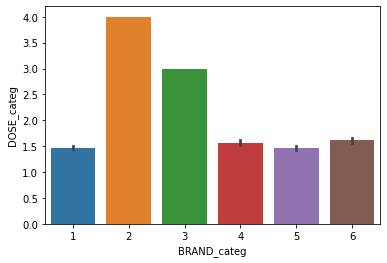

In [61]:
#Bar Plot
sns.barplot(data=final, x="BRAND_categ", y="DOSE_categ")

To know the number of tests performed at each region we are using a violinplot which shows that the number of tests performed at each region are much similar and there is no much difference in the region wise tests performed.

<AxesSubplot:xlabel='REGION_categ', ylabel='TESTS_ALL_POS'>

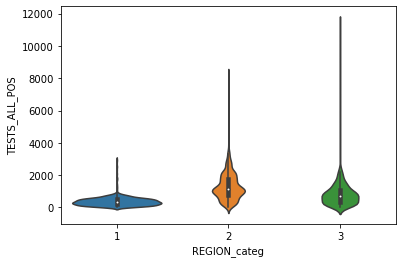

In [62]:
#Violin Plot
sns.violinplot(x="REGION_categ",y="TESTS_ALL_POS",data=final)

We are using a striplot to diplay the regionwise total vaccines administered. It shows that the number of vaccines administered in the Flanders region is much higher than the other regions.

<AxesSubplot:xlabel='REGION_categ', ylabel='COUNT'>

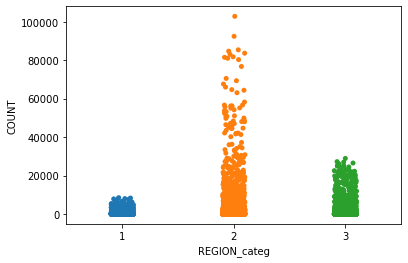

In [63]:
#Strip Plot
sns.stripplot(data=final,x="REGION_categ",y="COUNT")

<AxesSubplot:>

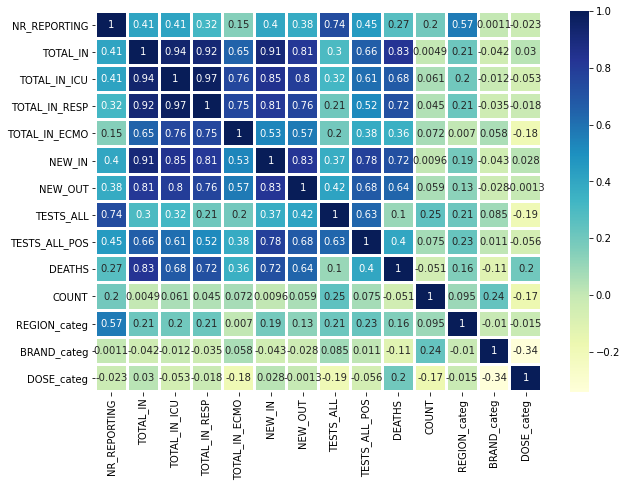

In [64]:
#HeatMap
plt.figure(figsize=(10,7))
sns.heatmap(final.corr(),annot=True,linewidths=2,cmap='YlGnBu')

We are using a jointplot to diplay the postive cases reported against the deaths.

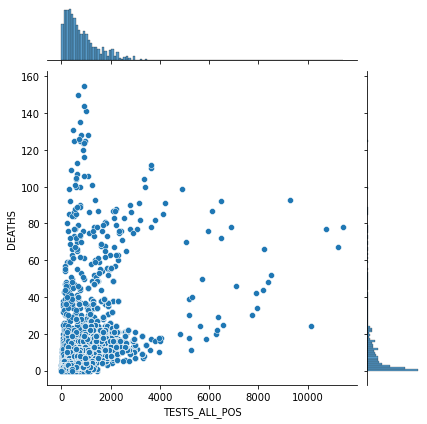

In [65]:
#Joint Plot
sns.jointplot(x = "TESTS_ALL_POS", y = "DEATHS", data = final)

We are using a swarnplot to display the deaths region wise this shows the number of deaths is highest in the Flanders Region compared to others.

#Swarm Plot
sns.swarmplot(x="REGION_categ", y="DEATHS", data=final)

<h2> Data Preparing for Modelling: </h2>

Statistics of the data for each columns displaying the variance of each column which shows how diverse is the data in each column.

In [66]:
final.var()

NR_REPORTING     2.323566e+02
TOTAL_IN         2.507251e+05
TOTAL_IN_ICU     1.552928e+04
TOTAL_IN_RESP    5.375737e+03
TOTAL_IN_ECMO    5.439076e+01
NEW_IN           1.834730e+03
NEW_OUT          1.960080e+03
TESTS_ALL        1.250866e+08
TESTS_ALL_POS    7.261771e+05
DEATHS           2.243262e+02
COUNT            5.180931e+07
REGION_categ     6.301467e-01
BRAND_categ      3.296970e+00
DOSE_categ       1.257128e+00
dtype: float64

The below data shows the data types of the final dataset we are using, Date column is in properly converted to date format and the numerical columns are present in int type and float types.

In [67]:
final.dtypes

DATE             datetime64[ns]
NR_REPORTING              int64
TOTAL_IN                  int64
TOTAL_IN_ICU              int64
TOTAL_IN_RESP             int64
TOTAL_IN_ECMO             int64
NEW_IN                    int64
NEW_OUT                   int64
TESTS_ALL                 int64
TESTS_ALL_POS             int64
DEATHS                  float64
COUNT                   float64
REGION_categ              int64
BRAND_categ               int64
DOSE_categ                int64
dtype: object

In [68]:
fin=final.copy()

## Removal of Outliers 

There exists a lot of outliers in our data, which is needed to be removed for better efficient prediction. 

In [69]:
#Remove Outliers
fin=fin.drop(columns="DATE")
Q1 = fin.quantile(0.25)
Q3 = fin.quantile(0.75)
IQR = Q3 - Q1
print(IQR)
fin_out = fin[~((fin < (Q1 - 1.5 * IQR)) |(fin > (Q3 + 1.5 * IQR))).any(axis=1)]
fin_out.shape

NR_REPORTING        37.00
TOTAL_IN           707.00
TOTAL_IN_ICU       142.00
TOTAL_IN_RESP       80.00
TOTAL_IN_ECMO       12.00
NEW_IN              50.00
NEW_OUT             43.25
TESTS_ALL        16802.00
TESTS_ALL_POS      881.25
DEATHS              10.00
COUNT             1315.00
REGION_categ         2.00
BRAND_categ          3.00
DOSE_categ           2.00
dtype: float64


(4223, 14)

<h3>Standardizing The Data</h3>

Here we are creating a copy of final data set we have created from the individual datasets we have so that we could create list of outliers of the data, but in our case outlier data is not relevant as the we have replaced all the null values in the count columns with the zero(0) value. Thus we are not eliminating any data from our final dataset.

In [70]:
#Standardizing Data
std=StandardScaler()
dt=std.fit_transform(fin[["NR_REPORTING","TOTAL_IN","TOTAL_IN_ICU","TOTAL_IN_RESP","NEW_IN","NEW_OUT","TESTS_ALL","TESTS_ALL_POS","DEATHS","COUNT","REGION_categ","BRAND_categ","DOSE_categ"]])
dt=pd.DataFrame(dt,columns=["NR_REPORTING","TOTAL_IN","TOTAL_IN_ICU","TOTAL_IN_RESP","NEW_IN","NEW_OUT","TESTS_ALL","TESTS_ALL_POS","DEATHS","COUNT","REGION_categ","BRAND_categ","DOSE_categ"])
fin=fin.drop(["NR_REPORTING","TOTAL_IN","TOTAL_IN_ICU","TOTAL_IN_RESP","NEW_IN","NEW_OUT","TESTS_ALL","TESTS_ALL_POS","DEATHS","COUNT","REGION_categ","BRAND_categ","DOSE_categ"],axis=1)
frames=[fin,dt]
dt=pd.concat(frames,axis=1)

In [71]:
final.dtypes

DATE             datetime64[ns]
NR_REPORTING              int64
TOTAL_IN                  int64
TOTAL_IN_ICU              int64
TOTAL_IN_RESP             int64
TOTAL_IN_ECMO             int64
NEW_IN                    int64
NEW_OUT                   int64
TESTS_ALL                 int64
TESTS_ALL_POS             int64
DEATHS                  float64
COUNT                   float64
REGION_categ              int64
BRAND_categ               int64
DOSE_categ                int64
dtype: object

On removal of outlier and standardising the data, we found few null values and duplicate values in our dataset created due to the process, which had to be deleted. Hence removal of such data from the dataset is carried out.

In [72]:
# Remove Null Data
dt=dt.fillna(value={'TOTAL_IN': '0'}, inplace=False)
dt=dt.fillna(value={'TOTAL_IN_ECMO': '0'}, inplace=False)
dt=dt.fillna(value={'NR_REPORTING': '0'}, inplace=False)
dt=dt.fillna(value={'TOTAL_IN_ICU': '0'}, inplace=False)
dt=dt.fillna(value={'TOTAL_IN_RESP': '0'}, inplace=False)
dt=dt.fillna(value={'NEW_IN': '0'}, inplace=False)
dt=dt.fillna(value={'NEW_OUT': '0'}, inplace=False)
dt=dt.fillna(value={'DEATHS': '0'}, inplace=False)
dt=dt.fillna(value={'COUNT': '0'}, inplace=False)
dt=dt.fillna(value={'TESTS_ALL': '0'}, inplace=False)
dt=dt.fillna(value={'TESTS_ALL_POS': '0'}, inplace=False)
dt=dt.drop(columns="REGION_categ")
dt=dt.drop(columns="BRAND_categ")
dt=dt.drop(columns="DOSE_categ")
dt.drop_duplicates(subset=None, inplace=True)

In [73]:
dt.shape

(5628, 11)

## Modelling

### Linear Regression

For linear regression, the number of positive cases is stored in X, which would act as the independent variable and the vaccination count would be stored in y, which would act as the dependent variable.

In [74]:
#Assigning dependent and independent variables for linear regression
X = dt[['TESTS_ALL_POS']]
X.values.reshape(-1,1)
y = dt[['COUNT']]
y.values.reshape(-1,1)

array([[-0.33115206],
       [-0.33115206],
       [-0.33115206],
       ...,
       [-0.33115206],
       [-0.33115206],
       [-0.33115206]])

Our dataset is split into training and test datasets with a ratio of 70:30.

In [75]:
# splits the training and test data set in 70% : 30%
# assign random_state to any value. This ensures consistency.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=123)
print("Training feature set size of X:",X_train.shape)
print("Test feature set size of y:",X_test.shape)
print("Training variable set size of X:",y_train.shape)
print("Test variable set size of y:",y_test.shape)

Training feature set size of X: (3939, 1)
Test feature set size of y: (1689, 1)
Training variable set size of X: (3939, 1)
Test variable set size of y: (1689, 1)


The training and test dataset is fitted into the linear regression model to predict the new positive cases of Covid-19 and the count of vaccinations.


In [76]:
lm = LinearRegression() # Creating a Linear Regression object 'lm'

In [77]:
lm.fit(X_train,y_train) # Fit the linear model on to the 'lm' object itself i.e. no need to set this to another variable

LinearRegression()

Check the intercept and coefficients and put them in a DataFrame

In [78]:
print("The intercept term of the linear model:", lm.intercept_)

The intercept term of the linear model: [0.03069596]


In [79]:
print("The coefficients of the linear model:", lm.coef_)

The coefficients of the linear model: [[0.09155816]]


In [80]:
#idict = {'Coefficients':lm.intercept_}
#idf = pd.DataFrame(data=idict,index=['Intercept'])
cdf = pd.DataFrame(data=lm.coef_, index=X_train.columns, columns=["Coefficients"])
#cdf=pd.concat([idf,cdf], axis=0)
cdf

,Coefficients
TESTS_ALL_POS,0.091558


### Calculation of standard errors and t-statistic for the coefficients

In [81]:
#calculate standard errors and t-stat for coeff

n=X_train.shape[0]
k=X_train.shape[1]
dfN = n-k
train_pred=lm.predict(X_train)
train_error = np.square(train_pred - y_train)
sum_error=np.sum(train_error)
se=[0]
for i in range(k):
    r = (sum_error/dfN)
    r = r/np.sum(np.square(X_train[list(X_train.columns)[i]]-X_train[list(X_train.columns)[i]].mean()))
    se[i]=np.sqrt(r)
cdf['Standard Error']=se
cdf['t-statistic']=cdf['Coefficients']/cdf['Standard Error']
cdf

,Coefficients,Standard Error,t-statistic
TESTS_ALL_POS,0.091558,COUNT 0.017434 dtype: float64,COUNT 5.251621 dtype: float64


In [82]:
l=list(cdf.sort_values('t-statistic',ascending=False).index)
print(' > \n'.join(l))

TESTS_ALL_POS


Text(0.5, 1.0, 'TESTS_ALL_POS vs. COUNT')

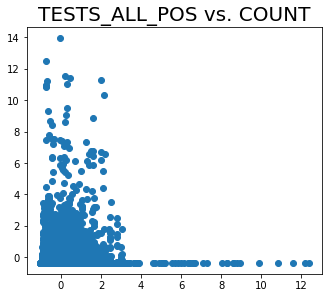

In [83]:
l=list(cdf.index)
from matplotlib import gridspec
fig = plt.figure(figsize=(18, 10))
gs = gridspec.GridSpec(2,3)
#f, ax = plt.subplots(nrows=1,ncols=len(l), sharey=True)
ax0 = plt.subplot(gs[0])
ax0.scatter(dt[l[0]],dt['COUNT'])
ax0.set_title(l[0]+" vs. COUNT", fontdict={'fontsize':20})


### Prediction, error estimate, and regression evaluation matrices
Prediction using the lm model

In [84]:
predictions = lm.predict(X_test)
print ("Type of the predicted object:", type(predictions))
print ("Size of the predicted object:", predictions.shape)

Type of the predicted object: <class 'numpy.ndarray'>
Size of the predicted object: (1689, 1)


Scatter plot of predicted price and y_test 

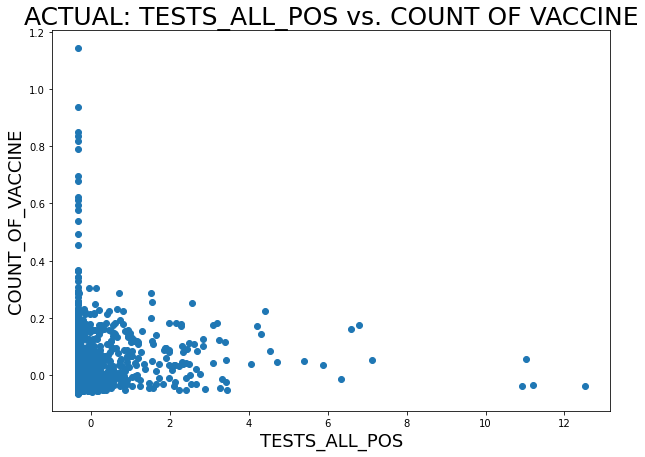

In [85]:
#Actual Scatter Plot
plt.figure(figsize=(10,7))
plt.title("ACTUAL: TESTS_ALL_POS vs. COUNT OF VACCINE",fontsize=25)
plt.xlabel("TESTS_ALL_POS",fontsize=18)
plt.ylabel("COUNT_OF_VACCINE", fontsize=18)
plt.scatter(x=y_test,y=predictions)

Plotting histogram of the residuals i.e. predicted errors

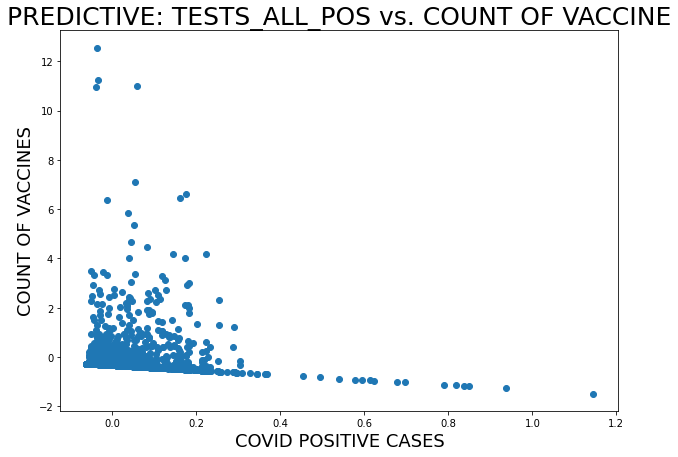

In [88]:
#Predictive Scatter Plot
plt.figure(figsize=(10,7))
plt.title("PREDICTIVE: TESTS_ALL_POS vs. COUNT OF VACCINE",fontsize=25)
plt.xlabel("COVID POSITIVE CASES",fontsize=18)
plt.ylabel("COUNT OF VACCINES", fontsize=18)
plt.scatter(x=predictions,y=y_test-predictions)

### Regression evaluation metrices

In [87]:
#Find MAE,MSE,RMSE
print("Mean absolute error (MAE):", metrics.mean_absolute_error(y_test,predictions))
print("Mean square error (MSE):", metrics.mean_squared_error(y_test,predictions))
print("Root mean square error (RMSE):", np.sqrt(metrics.mean_squared_error(y_test,predictions)))

Mean absolute error (MAE): 0.4661438639788965
Mean square error (MSE): 0.8588527950844399
Root mean square error (RMSE): 0.9267431117005618
